# 2D Linear Inversion of Crosswell Tomography Data 

In [1]:
import numpy as np
from geoscilabs.inversion.TomographyInversion import TomographyInversionApp
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib inline

# Purpose

From the Linear inversion notebook (1D), we learned important apsects about the linear inversion. 
However, real world geophysical inverse problem are not often 1D, but multidimensional (2D or 3D), and this extension of dimension allows us to put more apriori (or geologic) information through the regularization term. 
In this notebook, we explore these multidimensional aspects of the linear inversion by using 2D traveltime croswell tomography example. 

## Outline
This notebook includes four steps:
- Step1: Generate a velocity model
- Step2: Simulate traveltime data and add noise
- Step3: Run $l_2$ inversion

## Step1: Generate a velocity model

Here we set up a velocity model using a following app. Controlling parameters of the app are:

- `set mesh`: use active **only** when you want to change the 2D mesh
- `add block`: use active when you want to add block (if not stay inactive)
- `model type`: background or block
- `show grid?`: show grid of the mesh

- `v0`: velocity of the background
- `v1`: velocity of the block
- `xc`: x center of the block
- `yc`: y center of the block
- `dx`: width of the block
- `dy`: thickness of the block
- `nx`: # of cells in x-direction (this is only active when `set_mesh=active`)
- `ny`: # of cells in y-direction (this is only active when `set_mesh=active`)

### Changing # of cells in $x$- or $z$- direction
Related parameters for this task are: `set mesh`, `nx`, `ny`. 
Size of the 2D domain are fixed to 200m $\times$ 400m, but the number of cells in each direction can be changed such that you can alter size of the cells in each direction. When you change either `nx` or `ny` make sure you choose `set mesh=active` otherwise `set mesh=inactive`. Note that once mesh setup is changed, velocity model is reset to a background value (`v0`). 

### Changing a parameter of a single block
Although you can change the location, size, and velocity of the block there are few rules that you need to follow to do so. 

1. If you want to change the parameter of the block: first set `add block=active` then change parameters of the block (`v1`, `xc`, `zc`, `dx`, `dy`)

2. Once you changed the parameters, make sure first choose `model type=background` then change that to `model type=block`

### Adding more blocks
You can also add multiple blocks. To add a block follow below steps:

1. Set `add block=inactive`, then change the parameter of the new block using: `v1`, `xc`, `zc`, `dx`, `dy`. Velocity model will not change, but you can see the white lines which illustrate boundary of the new block.

2. Once you are happy with the new block, set `add block=active`, then velocity model will be updated with the new block that you have set. 

3. Repeat 1 and 2 if you want to add more blocks. 


In [2]:
app = TomographyInversionApp()
app.interact_plot_model()

## Step2: Simulate travel time data and add noise

Within this app, by using the velocity model set up, we simulate traveltime tomography data and add Gaussian noise. This syntehtic data set will be used in the following inversion module. Controlling parameters are:

- `percent (%)`: percentage of the Gaussian noise
- `floor (s)`: floor of the Gaussain noise
- `random seed`: seed to generate random variables having normal distribution
- `tx_rx_plane` or `histogram`: choice of the plotting data
- `update`: this buttion is for the interactin between the first app. If the velocity model is changed by altering the first app, you can simply click `update` to run simulation again with the updated velocity model. 


In [3]:
app.interact_data()

## Step3: $l_2$ inversion

- `maxIter`: maximum number of iteration
- `m0`: initial model
- `mref`: reference model
- `percentage`: percent standard deviation for the uncertainty
- `floor`: floor value for the uncertainty
- `chifact`: chifactor for the target misfit
- `beta0_ratio`: ratio to set the initial beta
- `coolingFactor`: cooling factor to cool beta
- `n_iter_per_beta`: # of interation for each beta value 
- `alpha_s`: $\alpha_s$
- `alpha_x`: $\alpha_x$
- `alpha_z`: $\alpha_z$
- `use_target`: use target misfit as a stopping criteria or not

### Step 3-1: Run inversion

In [4]:
model, pred, save = app.run_inversion(
    maxIter=20,
    m0=1./1000.,
    mref=1./1250.,
    percentage=0,
    floor=0.01,
    chifact=1,
    beta0_ratio=1e2,
    coolingFactor=2,
    n_iter_per_beta=1,
    alpha_s=1/(app.mesh_prop.hx.min())**2 * 1e4,
    alpha_x=1,
    alpha_z=1,
    use_target=True
)

1

        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
        ***Done using same Solver and solverOpts as the problem***
SimPEG.SaveOutputEveryIteration will save your inversion progress as: '###-InversionModel-2020-04-30-13-09.txt'
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  2.39e+06  3.40e+02  4.00e-02  9.60e+04    1.41e-02      0              
   1  1.20e+06  6.76e+02  3.53e-06  6.81e+02    3.20e+05      0              
   2  5.98e+05  6.60e+02  1.37e-05  6.68e+02    3.15e+05      0              
   3  2.99e+05  6.30e+02  5.14e-05  6.45e+02    3.05e+05      0   Skip BFGS  
   4  1.50e+05  5.77e+02  1.83e-04  6.04e+02    2.87e+05      0   Skip BFGS  
   5  7.48e+04  4.94e+02  5.91e-04  5.38e+02    2.59e+05      0   Skip BFGS 

### Step 3-2: Plot recovered model

In [5]:
app.interact_model_inversion(model, clim=None)

interactive(children=(IntSlider(value=10, description='ii', max=10), Checkbox(value=False, description='fixed'…

In [6]:
1./20**2

0.0025

### Step 3-3: Plot predicted data 

In [7]:
app.interact_data_inversion(pred)

interactive(children=(IntSlider(value=10, continuous_update=False, description='ii', max=10), Checkbox(value=F…

### Step 3-4: Plot misfit curves

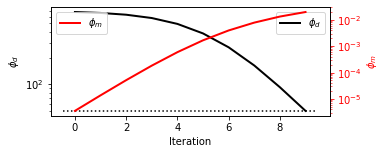

In [8]:
save.plot_misfit_curves()

In [ ]:
save.plot_tikhonov_curves()